Team 3: Michael Foley, Karen Garcia, Jason Raeppold

In [28]:
#Project 1 - Portfolio Investment Advisor - Alcohol vs Marijuana

#Determine the following:
#-Historical industry performance
#-Industry performance comparison
#-Industry risk analysis
#-Portfolio recommendation

In [29]:
##Begin Pseudocode Here
#1-2

In [30]:
#Import the required libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import hvplot.pandas
from MCForecastTools import MCSimulation

%matplotlib inline

In [31]:
# Set Alpaca API key and secret

load_dotenv()
api_key= os.getenv("ALPACA_API_KEY")
sec_key= os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    api_key,
    sec_key,
    api_version="v2"
)

In [32]:
# Get 3 years worth of historical data for Alcohol stocks

start_date = pd.Timestamp('2019-04-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-04-20', tz='America/New_York').isoformat()

tickers = ["BUD", "DEO", "SAM", "TAP", "STZ"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for Alcohol Stocks

df_alc_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

#Set index to date and view dataframe
df_alc_data.index = df_alc_data.index.date
df_alc_data.head(-5)


,open,high,low,close,volume,trade_count,vwap,symbol
2019-04-22,89.69,90.4700,89.58,89.60,970834,9479,90.000447,BUD
2019-04-23,88.56,89.7900,88.50,89.25,755451,7907,89.242818,BUD
2019-04-24,89.02,89.1300,87.82,88.21,1038366,11509,88.324096,BUD
2019-04-25,86.89,87.0200,86.00,86.64,1341678,13124,86.467163,BUD
2019-04-26,87.38,87.6250,86.83,87.58,920430,9005,87.292918,BUD
...,...,...,...,...,...,...,...,...
2022-04-06,51.30,51.6600,50.52,50.76,1364998,19586,50.900272,TAP
2022-04-07,50.66,50.8750,49.77,50.49,1509046,19780,50.416991,TAP
2022-04-08,50.93,51.7389,50.59,51.56,1136563,15412,51.429797,TAP
2022-04-11,51.81,53.6400,51.80,52.84,1216072,19571,52.899706,TAP


In [33]:
#Drop null values
df_alc_data.dropna()

,open,high,low,close,volume,trade_count,vwap,symbol
2019-04-22,89.69,90.470,89.5800,89.60,970834,9479,90.000447,BUD
2019-04-23,88.56,89.790,88.5000,89.25,755451,7907,89.242818,BUD
2019-04-24,89.02,89.130,87.8200,88.21,1038366,11509,88.324096,BUD
2019-04-25,86.89,87.020,86.0000,86.64,1341678,13124,86.467163,BUD
2019-04-26,87.38,87.625,86.8300,87.58,920430,9005,87.292918,BUD
...,...,...,...,...,...,...,...,...
2022-04-13,53.64,54.560,53.6400,54.29,1255859,19120,54.220964,TAP
2022-04-14,54.50,55.810,54.5000,55.61,2332000,21843,55.493185,TAP
2022-04-18,55.71,56.400,55.3400,55.63,1496739,20514,55.779267,TAP
2022-04-19,55.81,56.300,55.7075,55.87,992247,16712,55.912625,TAP


In [34]:
# Pivot symbol and close price columns
alc_close_prices = df_alc_data.pivot(values=["close"], columns= "symbol")
alc_close_prices

close                               
symbol        BUD     DEO     SAM     STZ    TAP
2019-04-22  89.60  162.58  271.34  205.46  61.16
2019-04-23  89.25  163.80  277.73  207.48  61.28
2019-04-24  88.21  164.13  276.43  210.14  62.51
2019-04-25  86.64  164.17  300.00  212.16  62.80
2019-04-26  87.58  166.48  304.56  212.16  63.83
...           ...     ...     ...     ...    ...
2022-04-13  58.58  207.18  375.13  248.63  54.29
2022-04-14  58.78  209.22  365.76  251.42  55.61
2022-04-18  58.72  207.20  357.68  252.82  55.63
2022-04-19  59.19  203.66  364.87  253.87  55.87
2022-04-20  61.49  205.20  361.22  258.78  56.78

[757 rows x 5 columns]

In [8]:
alc_returns = alc_close_prices.pct_change()
alc_returns.dropna()

close                                        
symbol           BUD       DEO       SAM       STZ       TAP
2019-04-23 -0.003906  0.007504  0.023550  0.009832  0.001962
2019-04-24 -0.011653  0.002015 -0.004681  0.012821  0.020072
2019-04-25 -0.017798  0.000244  0.085266  0.009613  0.004639
2019-04-26  0.010849  0.014071  0.015200  0.000000  0.016401
2019-04-29  0.004910 -0.002042 -0.001543  0.001791  0.000783
...              ...       ...       ...       ...       ...
2022-04-13  0.010871  0.002225 -0.004511 -0.000804  0.011552
2022-04-14  0.003414  0.009847 -0.024978  0.011221  0.024314
2022-04-18 -0.001021 -0.009655 -0.022091  0.005568  0.000360
2022-04-19  0.008004 -0.017085  0.020102  0.004153  0.004314
2022-04-20  0.038858  0.007562 -0.010004  0.019341  0.016288

[756 rows x 5 columns]

<AxesSubplot:>

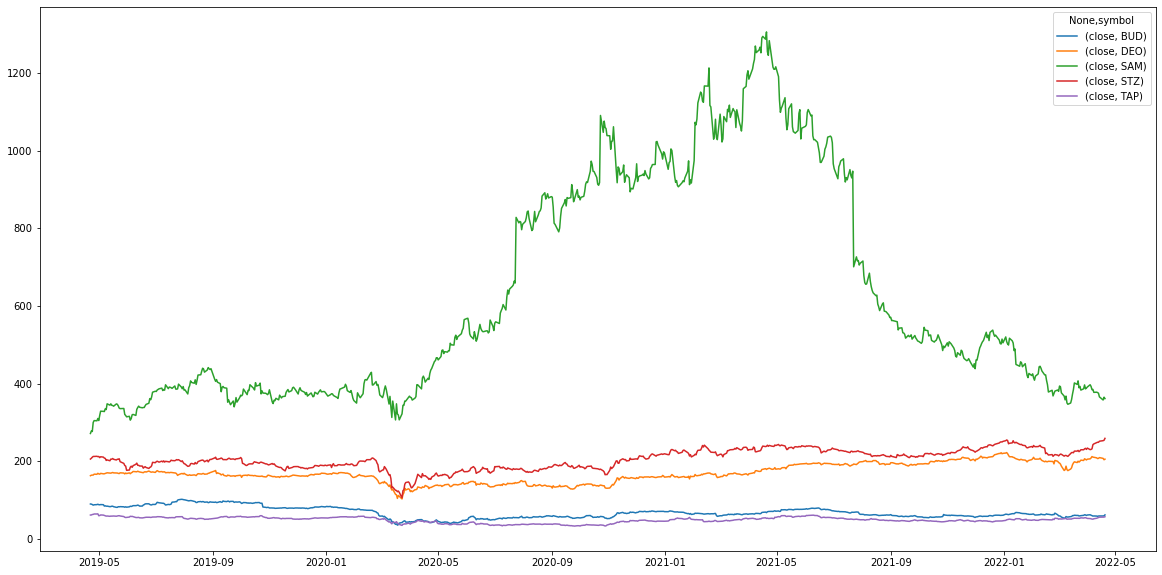

In [9]:
alc_close_prices.plot(figsize=(20,10))

In [10]:
#Verify equal amount of data
#df_alc_data["symbol"].value_counts()

In [26]:
df_alc_data[df_alc_data["symbol"]=="BUD"]["close"].hvplot()


:Curve   [index]   (close)

In [27]:
# Get 3 years worth of historical data for Cannabis stocks

start_date = pd.Timestamp('2019-04-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-04-20', tz='America/New_York').isoformat()

tickers = ["VFF","JAZZ","CRON", "TLRY","CGC"]
# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for Cannabis Stocks

df_cann_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

#Set index to date and view dataframe
df_cann_data.index = df_cann_data.index.date
df_cann_data.head(-5)

,open,high,low,close,volume,trade_count,vwap,symbol
2019-04-22,45.70,48.7000,45.0700,48.25,11914208,69791,47.142779,CGC
2019-04-23,48.20,48.6300,46.8600,47.41,8244109,44524,47.814767,CGC
2019-04-24,47.22,48.6600,46.6400,48.37,6386176,35773,48.075259,CGC
2019-04-25,48.16,48.5241,47.5000,48.20,4185409,22689,48.092160,CGC
2019-04-26,48.19,50.4300,48.1200,49.91,12612629,60890,49.787743,CGC
...,...,...,...,...,...,...,...,...
2022-04-06,5.16,5.2350,5.0301,5.14,480630,4559,5.137048,VFF
2022-04-07,5.13,5.1711,4.9600,5.04,356830,3783,5.061856,VFF
2022-04-08,5.01,5.0700,4.8200,4.83,1129375,6429,4.917287,VFF
2022-04-11,4.70,4.9200,4.6400,4.81,721407,5570,4.787688,VFF


In [13]:
#Verify equal amount of data
#df_cann_data["symbol"].value_counts()

In [14]:
# Pivot symbol and close price columns
cann_close_prices = df_cann_data.pivot(values=["close"], columns= "symbol")
cann_close_prices

close                             
symbol        CGC   CRON    JAZZ   TLRY    VFF
2019-04-22  48.25  16.86  125.97  51.82  11.56
2019-04-23  47.41  16.28  129.78  50.26  11.08
2019-04-24  48.37  16.59  129.42  51.30  12.29
2019-04-25  48.20  16.52  128.53  51.27  11.62
2019-04-26  49.91  17.16  130.99  53.15  11.57
...           ...    ...     ...    ...    ...
2022-04-13   7.11   3.49  162.30   6.42   4.88
2022-04-14   6.82   3.44  167.25   6.02   4.69
2022-04-18   5.99   3.26  164.07   5.74   4.47
2022-04-19   5.93   3.33  166.54   5.83   4.52
2022-04-20   5.73   3.21  168.00   5.41   4.45

[757 rows x 5 columns]

<AxesSubplot:>

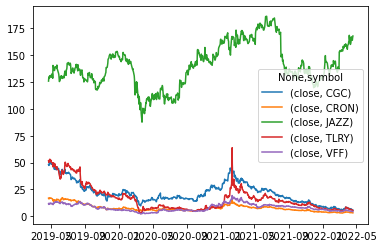

In [15]:
cann_close_prices.plot()

In [16]:
cann_returns = cann_close_prices.pct_change()
cann_returns.dropna()

close                                        
symbol           CGC      CRON      JAZZ      TLRY       VFF
2019-04-23 -0.017409 -0.034401  0.030245 -0.030104 -0.041522
2019-04-24  0.020249  0.019042 -0.002774  0.020692  0.109206
2019-04-25 -0.003515 -0.004219 -0.006877 -0.000585 -0.054516
2019-04-26  0.035477  0.038741  0.019140  0.036669 -0.004303
2019-04-29  0.042476 -0.008741  0.000458 -0.007902  0.038029
...              ...       ...       ...       ...       ...
2022-04-13  0.048673  0.029499  0.008450  0.030498  0.027368
2022-04-14 -0.040788 -0.014327  0.030499 -0.062305 -0.038934
2022-04-18 -0.121701 -0.052326 -0.019013 -0.046512 -0.046908
2022-04-19 -0.010017  0.021472  0.015055  0.015679  0.011186
2022-04-20 -0.033727 -0.036036  0.008767 -0.072041 -0.015487

[756 rows x 5 columns]

In [17]:
combined_df = pd.concat([alc_close_prices, cann_close_prices],axis="columns", join= "inner")
#combined_df.pivot(values=["close"], columns= "symbol")
combined_df

close                                                              \
symbol        BUD     DEO     SAM     STZ    TAP    CGC   CRON    JAZZ   TLRY   
2019-04-22  89.60  162.58  271.34  205.46  61.16  48.25  16.86  125.97  51.82   
2019-04-23  89.25  163.80  277.73  207.48  61.28  47.41  16.28  129.78  50.26   
2019-04-24  88.21  164.13  276.43  210.14  62.51  48.37  16.59  129.42  51.30   
2019-04-25  86.64  164.17  300.00  212.16  62.80  48.20  16.52  128.53  51.27   
2019-04-26  87.58  166.48  304.56  212.16  63.83  49.91  17.16  130.99  53.15   
...           ...     ...     ...     ...    ...    ...    ...     ...    ...   
2022-04-13  58.58  207.18  375.13  248.63  54.29   7.11   3.49  162.30   6.42   
2022-04-14  58.78  209.22  365.76  251.42  55.61   6.82   3.44  167.25   6.02   
2022-04-18  58.72  207.20  357.68  252.82  55.63   5.99   3.26  164.07   5.74   
2022-04-19  59.19  203.66  364.87  253.87  55.87   5.93   3.33  166.54   5.83   
2022-04-20  61.49  205.20  361.22  258.78  56.78   5.73   3.21  168.00   5.41   

                   
symbol        VFF  
2019-04-22  11.56  
2019-04-23  11.08  
2019-04-24  12.29  
2019-04-25  11.62  
2019-04-26  11.57  
...           ...  
2022-04-13   4.88  
2022-04-14   4.69  
2022-04-18   4.47  
2022-04-19   4.52  
2022-04-20   4.45  

[757 rows x 10 columns]

In [18]:
close_price_df = combined_df["close"]

In [19]:
#Plot data
close_price_df.hvplot()

:NdOverlay   [symbol]
   :Curve   [index]   (value)

In [20]:
combined_returns = pd.concat([alc_returns, cann_returns],axis="columns", join= "inner")

combined_returns.dropna()

close                                                    \
symbol           BUD       DEO       SAM       STZ       TAP       CGC   
2019-04-23 -0.003906  0.007504  0.023550  0.009832  0.001962 -0.017409   
2019-04-24 -0.011653  0.002015 -0.004681  0.012821  0.020072  0.020249   
2019-04-25 -0.017798  0.000244  0.085266  0.009613  0.004639 -0.003515   
2019-04-26  0.010849  0.014071  0.015200  0.000000  0.016401  0.035477   
2019-04-29  0.004910 -0.002042 -0.001543  0.001791  0.000783  0.042476   
...              ...       ...       ...       ...       ...       ...   
2022-04-13  0.010871  0.002225 -0.004511 -0.000804  0.011552  0.048673   
2022-04-14  0.003414  0.009847 -0.024978  0.011221  0.024314 -0.040788   
2022-04-18 -0.001021 -0.009655 -0.022091  0.005568  0.000360 -0.121701   
2022-04-19  0.008004 -0.017085  0.020102  0.004153  0.004314 -0.010017   
2022-04-20  0.038858  0.007562 -0.010004  0.019341  0.016288 -0.033727   

                                                    
symbol          CRON      JAZZ      TLRY       VFF  
2019-04-23 -0.034401  0.030245 -0.030104 -0.041522  
2019-04-24  0.019042 -0.002774  0.020692  0.109206  
2019-04-25 -0.004219 -0.006877 -0.000585 -0.054516  
2019-04-26  0.038741  0.019140  0.036669 -0.004303  
2019-04-29 -0.008741  0.000458 -0.007902  0.038029  
...              ...       ...       ...       ...  
2022-04-13  0.029499  0.008450  0.030498  0.027368  
2022-04-14 -0.014327  0.030499 -0.062305 -0.038934  
2022-04-18 -0.052326 -0.019013 -0.046512 -0.046908  
2022-04-19  0.021472  0.015055  0.015679  0.011186  
2022-04-20 -0.036036  0.008767 -0.072041 -0.015487  

[756 rows x 10 columns]

<AxesSubplot:>

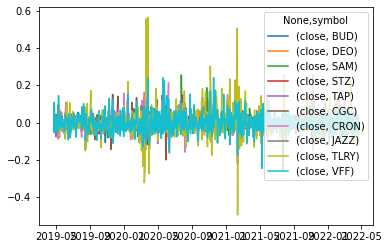

In [21]:
combined_returns.plot()

<AxesSubplot:>

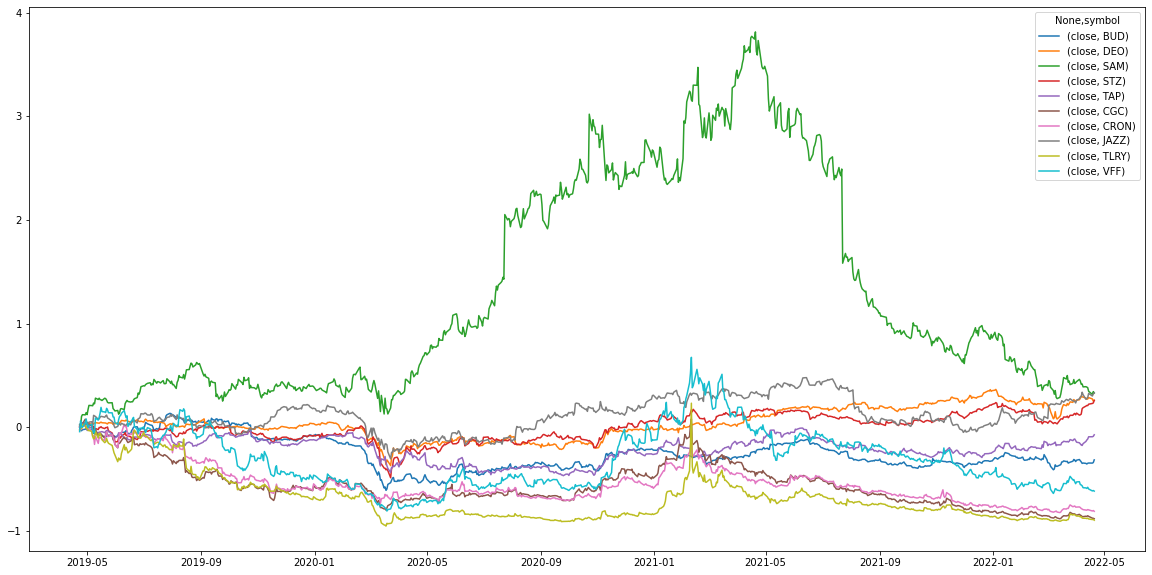

In [22]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

In [23]:
# Calculate the daily standard deviations of all portfolios
cumulative_returns.std()

       symbol
close  BUD       0.160465
       DEO       0.150423
       SAM       1.048105
       STZ       0.125146
       TAP       0.117691
       CGC       0.208238
       CRON      0.196766
       JAZZ      0.159632
       TLRY      0.231668
       VFF       0.288692
dtype: float64

In [24]:
# Annualized Sharpe Ratios
sharpe_ratio = (cumulative_returns.mean() * 252) / (cumulative_returns.std() *np.sqrt(252))
sharpe_ratio

NameError: name 'np' is not defined

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar")